Problem definition

In [ ]:
import numpy as np

from desdeo_problem import variable_builder, ScalarObjective, MOProblem
from desdeo_problem.testproblems.TestProblems import test_problem_builder
import plotly.graph_objects as go
from desdeo_mcdm.utilities.solvers import solve_pareto_front_representation
from desdeo_mcdm.interactive.ReferencePointMethod import ReferencePointMethod


def phi(x):
    return fi(x) - np.exp(-50*fi(x))
def fi(x):
    return x[:,0]**2 + x[:,1]**2

def f_1(x):
    return phi(x)

def f_2(x):
    aux = np.copy(x)
    aux[:,1] = aux[:,1] - 1
    return phi(aux)

def f_3(x):
    aux = np.copy(x)
    aux[:,0] = aux[:,0] - 1
    return phi(aux)

def objective_function(x):
    return np.array([f1(x), f2(x), f3(x)])


list_vars = variable_builder(['x', 'y'],
                             initial_values = [0,0],
                             lower_bounds=[0, 0],
                             upper_bounds=[1, 1])

f1 = ScalarObjective(name='f1', evaluator=f_1)
f2 = ScalarObjective(name='f2', evaluator=f_2)
f3 = ScalarObjective(name='f3', evaluator=f_3)
list_objs = [f1, f2, f3]

problem = MOProblem(variables=list_vars, objectives=list_objs)
p_front = solve_pareto_front_representation(problem, step=1.0)[1]

In [2]:
z_low= np.array([-1.0,-1.0,-1.0])
z_up = np.array([1.0, 2.0, 2.0])
z = np.array([
    [-0.18, 0.78, 0.78],
    [0.16, 0.41, 0.91],
    [0.47, 0.12, 1.22],
    [0.16, 0.91, 0.41],
    [0.28, 0.53, 0.53],
    [0.41, 1.16, 0.16]
])

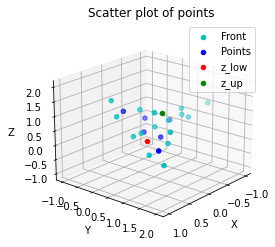

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(p_front[:, 0], p_front[:, 1], p_front[:, 2], c='c', marker='o', label='Front')
ax.scatter(z[:, 0], z[:, 1], z[:, 2], c='b', marker='o', label='Points')
ax.scatter(z_low[0], z_low[1], z_low[2], c='r', marker='o', label='z_low')
ax.scatter(z_up[0], z_up[1], z_up[2], c='g', marker='o', label='z_up')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Scatter plot of points')

# Add legend
ax.legend()

# Rotate the view to show X in front
ax.view_init(elev=20, azim=40)

# Show the plot
plt.show()

In [11]:
from gekko import GEKKO

# Initialize Model
m = GEKKO(remote=False)
m.options.DIAGLEVEL=5

# Define Variables
alpha = m.Var(value=0)  # Variable alpha

# Define a list of weights (w) and average values (z̄)
w = [0.3, 0.3, 0.4]  # Example weights
z_bar = [0.1, 0.1, 0.1]  # Example average value

z_i = [0.28, 0.53, 0.53]
z_dot = [0,0,0]
d = [0,0,0]

# Define Objective Function
m.Obj(alpha)  # Objective function to minimize

# Define Constraints
m.Equation(w[0] * (z_i[0] - (z_dot[0] + d[0])) <= alpha)
m.Equation(w[1] * (z_i[1] - (z_dot[1] + d[1])) <= alpha)
m.Equation(w[2] * (z_i[2] - (z_dot[2] + d[2])) <= alpha)

# Solve the Optimization Problem
m.solve(disp=True)

# Print Results
print(f"Optimal value of alpha: {alpha.value[0]}")

print('Lagrange multipliers')
lam = np.loadtxt(m.path + '/apm_lam.txt')
print(lam)



 ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 Called files( 55 )
 File copy failed: overrides.dbs does not exist
 files: overrides.dbs does not exist
 ARGUMENT  1 : gk_model7
 ARGUMENT  2 : 
 
 Run id   : 2024y02m28d11h15m42.824s
 
 COMMAND LINE ARGUMENTS
 coldstart:  0
 imode    :  3
 dbs_read :  T
 dbs_write:  T
 specs    :  T
 
 rto selected
 Called files( 35 )
 READ info FILE FOR VARIABLE DEFINITION: gk_model7.info
 SS MODEL INIT  0
 Parsing model file gk_model7.apm
 Read model file (sec): 0.0035000000000000005
 Initialize constants (sec): 0.
 Determine model size (sec): 0.0011000000000000003
 Allocate memory (sec): 0.
 Parse and store model (sec): 0.0009999999999999992
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  0
   Constants    :  0
   Variables    :  4
   Intermediates:  0
   Connections  :  0
 